In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_excel('/content/dataset.xlsx')
data.drop(columns=['No'], inplace=True)  # Drop unnecessary column
X = data.drop(columns=['Y house price of unit area'])  # Features
y = data['Y house price of unit area']

In [ ]:
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


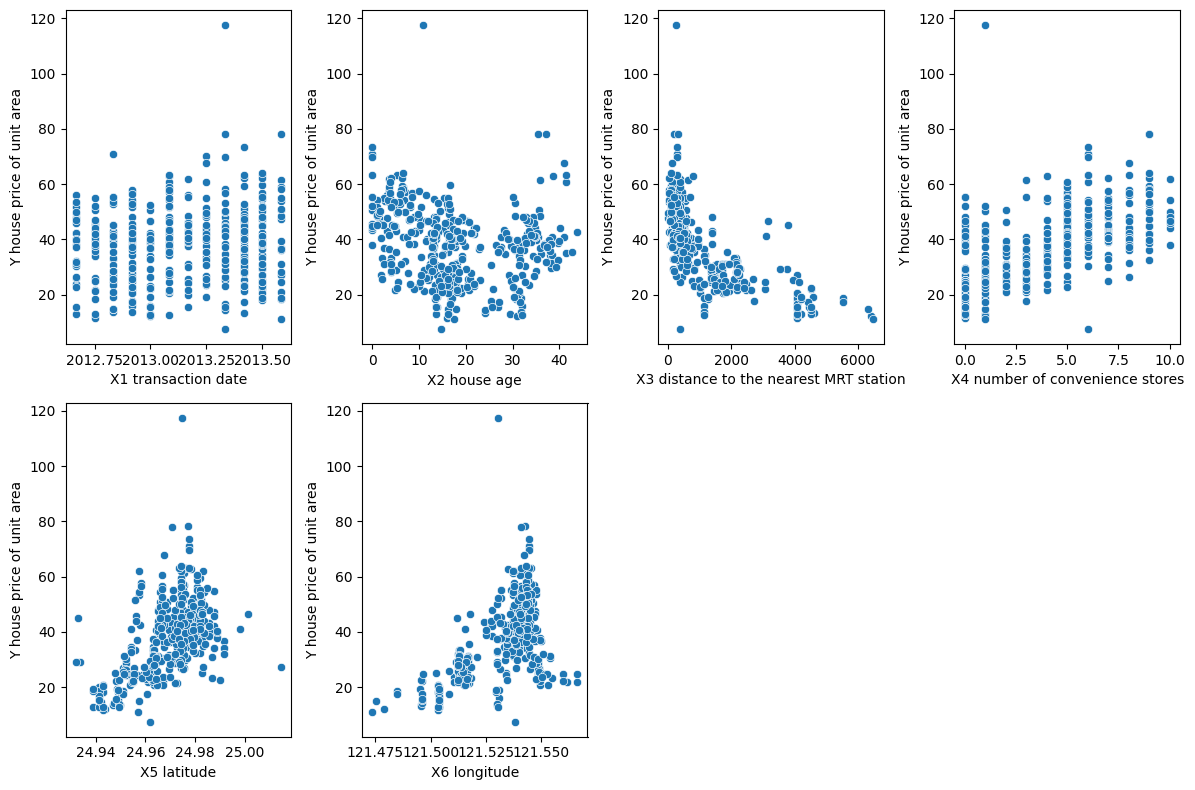

In [ ]:
# EDA - Visualize relationships between features and target variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=col, y='Y house price of unit area', data=data)
plt.tight_layout()
plt.show()

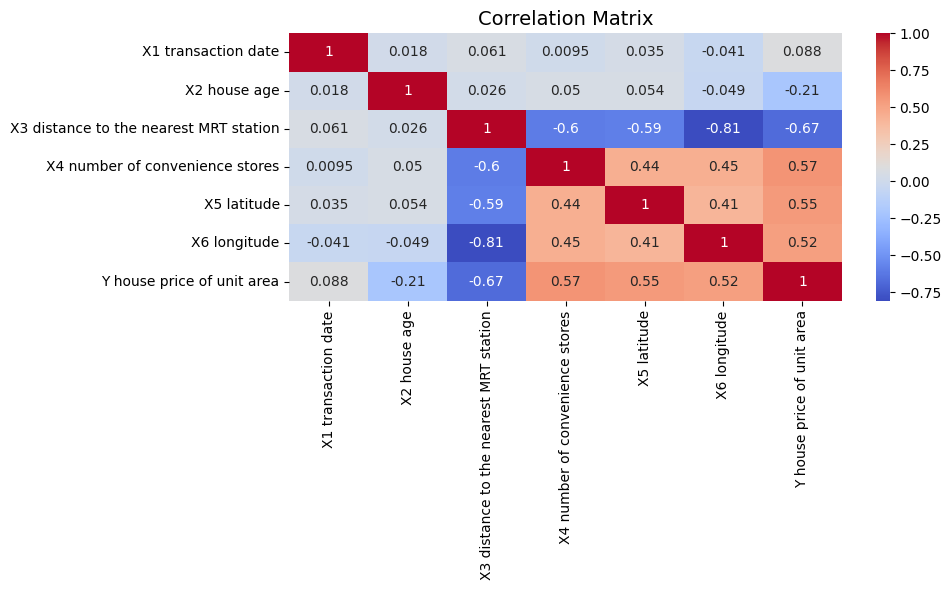

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns_heatmap = sns.heatmap(correlation,
                          annot=True,  # Display correlation values on the heatmap
                          cmap="coolwarm")  # Choose a colormap (options include "coolwarm", "YlGnBu", etc.)

# Add a title and labels
sns_heatmap.set_title('Correlation Matrix', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#data.drop(columns=['X3 distance to the nearest MRT station'], inplace=True)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    print(f"Evaluating {name} model...")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print()


Training Linear Regression model...
Evaluating Linear Regression model...
MAE: 5.305232952584752
MSE: 53.502252361179515
R2 Score: 0.6810781244679265

Training Decision Tree model...
Evaluating Decision Tree model...
MAE: 6.046987951807229
MSE: 67.88253012048195
R2 Score: 0.5953586462914047

Training KNN model...
Evaluating KNN model...
MAE: 4.92
MSE: 54.458351807228915
R2 Score: 0.6753789059290357



In [ ]:
print("Hyperparameter tuning for Decision Tree...")
params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt_model, params, cv=5, scoring='r2')
dt_grid_search.fit(X, y)
best_dt_model = dt_grid_search.best_estimator_
print("Best Decision Tree Model:", best_dt_model)

Hyperparameter tuning for Decision Tree...
Best Decision Tree Model: DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)


In [ ]:
# Step 6: Model Evaluation (After Hyperparameter Tuning)
print("Evaluating Best Decision Tree Model...")
best_dt_model.fit(X_train, y_train)  # Re-fit the best model on the entire training data
y_pred_val = best_dt_model.predict(X_test)  # Make predictions on validation set
r2_val = r2_score(y_test, y_pred_val)  # Calculate R2 score for validation
print("Best Decision Tree R2 Score for Validation:", r2_val)


Evaluating Best Decision Tree Model...
Best Decision Tree R2 Score for Validation: 0.772989733062032


In [ ]:
print("Hyperparameter tuning for KNN...")
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_model = KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn_model, params, cv=5, scoring='r2')
knn_grid_search.fit(X, y)
best_knn_model = knn_grid_search.best_estimator_
print("Best KNN Model:", best_knn_model)


Hyperparameter tuning for KNN...
Best KNN Model: KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')


In [ ]:
# Step 6: Model Evaluation (After Hyperparameter Tuning)
print("Evaluating Best KNN Model...")
best_knn_model.fit(X_train, y_train)  # Re-fit the best model on the entire training data
y_pred_val = best_dt_model.predict(X_test)  # Make predictions on validation set
r2_val = r2_score(y_test, y_pred_val)  # Calculate R2 score for validation
print("Best Decision Tree R2 Score for Validation:", r2_val)

Evaluating Best KNN Model...
Best Decision Tree R2 Score for Validation: 0.772989733062032
